Carles Falcó i Gandia

Perm Number: 7621931

falcoigandia@ucsb.edu

In [9]:
# Python modules
from math import sqrt
from numpy import zeros, array, insert, concatenate, linspace
import matplotlib.pyplot as plt
from pandas import DataFrame

# Natural Splines

We'll write a code capable of computing a natural spline $S(x)$ given the data: $(x_0,y_0),\ldots,(x_n,y_n)$ where $x_0<x_1<\ldots <x_n$.


In [10]:
# Solving tridiagonal systems of linear equations

# Solving upper diagonal system Ux = y
# INPUT: U (linear system matrix, upper diagonal), 
# y (column vector)
# OUTPUT: x (unkowns column vector)
# Carles Falcó i Gandia
# 14/11/18
def linear_u_solver(U,y):
    x = zeros( len(y) )
    for i in range(len(y)-1,-1,-1):
        coef = [U[i][j]*x[j] for j in range(len(y)-1,i,-1)]
        x[i] = ( y[i]-sum(coef) )/U[i][i]
    return x

# Solving lower diagonal system Lx = y
# INPUT: L (linear system matrix, lower diagonal), 
# y (column vector)
# OUTPUT: x (unkowns column vector)
# Carles Falcó i Gandia
# 14/11/18
def linear_l_solver(U,y):
    x = zeros( len(y) )
    for i in range(0,len(y)):
        coef = [U[i][j]*x[j] for j in range(0,i)]
        x[i] = ( y[i]-sum(coef) )/U[i][i]
    return x

# LU decomposition for tridiagonal system M = LU
# INPUT: M (tridiagonal matrix), L, U (zeros matrixes)
# OUTPUT: Filling L and U so that:
# L is lower diagonal 
# U is upper diagonal
# Carles Falcó i Gandia
# 14/11/18
def LU_dec_tri(M,L,U):
    U[0][0] = M[0][0]
    L[-1][-1] = 1
    for j in range(0,len(M)-1):
        L[j][j] = 1
        U[j][j+1] = M[j][j+1]
        L[j+1][j] = M[j+1][j]/U[j][j]
        U[j+1][j+1] = M[j+1][j+1] - L[j+1][j]*M[j][j+1]

# Solving a tridiagonal system Mx = y
# INPUT: A (tridiagonal matrix), y (column vector)
# OUTPUT: x (unknown column vector)
# Carles Falcó i Gandia
# 14/11/18
def linear_tri_solver(M,y):
    L = zeros( (len(M),len(M)) )
    U = zeros( (len(M),len(M)) )
    LU_dec_tri(M,L,U)
    u = linear_l_solver(L,y)
    x = linear_u_solver(U,u)
    return x

# Solving spline linear system 
# INPUT: x, y (points), z0,zn unspecified spline values
# OUTPUT: z = (z1,...,z_n-1)
# Carles Falcó i Gandia
# 16/11/18
def spline_matrix_solver(x,y,z0,zn):
    h = [x[i] - x[i-1] for i in range(1,len(x))]
    d = []
    for i in range(0,len(x) - 2):
        d.append(-6/h[i]*(y[i+1]-y[i]) + 6/h[i+1]*(y[i+2]-y[i+1]))
    d[0] = d[0] - h[0]*z0
    d[-1] = d[-1] -h[-2]*zn
    A = zeros((len(x)-2,len(x)-2))
    for i in range(0,len(A)):
        A[i][i] = 2*(h[i] + h[i+1])
        if (i > 0):
            A[i][i-1] = h[i] 
            A[i-1][i] = h[i]
    z = linear_tri_solver(A,d)
    return concatenate(([z0],z[0:],[zn]))

# Natural spline S(x)
# INPUT: x,y (points) z0=zn=0, X (evaluating spline)
# OUTPUT S(x)
# Carles Falcó i Gandia
# 14/11/18
def natural_spline(x,y,X):
    z = spline_matrix_solver(x,y,0,0)
    j = 0
    while(X >= x[j] and j < len(x) - 1): # only for valid points
        j = j + 1
    j = j - 1
    hj = (x[j+1]-x[j])
    A = 1/6/hj*(z[j+1]-z[j])
    B = 1/2*z[j]
    C = 1/hj*(y[j+1]-y[j]) - 1/6*hj*(z[j+1]+2*z[j])
    D = y[j]
    w = X - x[j]
    return A*w**3 + B*w**2 + C*w + D

# Natural spline coefficients
# INPUT: x,y (points) z0=zn=0, X (evaluating spline)
# OUTPUT [A,B,C,D] (spline coefficients)
# Carles Falcó i Gandia
# 16/11/18
def natural_spline_coefficients(x,y,X):
    z = spline_matrix_solver(x,y,0,0)
    j = 0
    while(X >= x[j] and j < len(x) - 1): # only for valid points
        j = j + 1
    j = j - 1
    hj = (x[j+1]-x[j])
    A = 1/6/hj*(z[j+1]-z[j])
    B = 1/2*z[j]
    C = 1/hj*(y[j+1]-y[j]) - 1/6*hj*(z[j+1]+2*z[j])
    D = y[j]
    return [A,B,C,D]

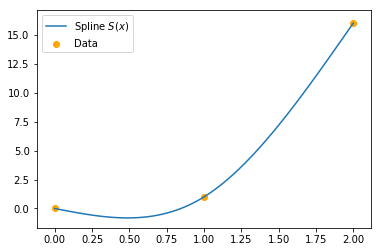

z =  [  0.  21.   0.]
[A_0,B_0,C_0,D_0] =  [3.5, 0.0, -2.5, 0]
[A_1,B_1,C_1,D_1] =  [-3.5, 10.5, 8.0, 1]


In [11]:
# We can test the code with the example from the lecture notes
a = [0,1,2]
b = [0,1,16]
t = linspace(0,2,100)
q = []
for i in t:
    q.append(natural_spline(a,b,i))
plt.plot(t,q,label = 'Spline $S(x)$')
plt.scatter(a,b, label = 'Data',color='orange')
plt.legend()
plt.show()

# Testing spline_matrix_solver:
print('z = ',spline_matrix_solver(a,b,0,0))
# Testing coefficients:
lncoef = natural_spline_coefficients(a,b,1/2)
lncoef2 = natural_spline_coefficients(a,b,3/2)
print('[A_0,B_0,C_0,D_0] = ', lncoef)
print('[A_1,B_1,C_1,D_1] = ', lncoef2)

# Smooth curves in parametric representation

We'll tabulate the spline coefficients $A_j, B_j,C_j,D_j$ for the two splines $x(t)$ and $y(t)$. We'll also plot the corresponding curves for the given data.

In [12]:
# Storing the data
x_j = array([1.5,0.9,0.6,0.35,0.20,0.10,0.50,1.,1.5])
y_j = array([0.75,0.90,1.,0.8,0.45,0.2,0.1,0.2,0.25])
t_j = zeros(len(x_j))
for i in range(1,len(x_j)):
    t_j[i] = t_j[i-1] + sqrt( (x_j[i]-x_j[i-1])**2 + (y_j[i]-y_j[i-1])**2 )
dat = {'$x_j$': x_j,'$y_j$':y_j,'$t_j$':t_j}
DataFrame(dat)

,$t_j$,$x_j$,$y_j$
0,0.000000,1.50,0.75
1,0.618466,0.90,0.90
2,0.934694,0.60,1.00
3,1.254850,0.35,0.80
4,1.635638,0.20,0.45
5,1.904897,0.10,0.20
6,2.317207,0.50,0.10
7,2.827109,1.00,0.20
8,3.329603,1.50,0.25


In [13]:
# Tabulating spline coefficients
# There will be a total of 7 coefficients in each spline
# INPUT: x_j, y_j, t_j (data)
# OUTPUT: tables with spline coefficients
# Carles Falcó i Gandia
# 16/11/18
xA = []; yA = []
xB = []; yB = []
xC = []; yC = []
xD = []; yD = []
for i in range(0,len(x_j)-1):
    xcoef = natural_spline_coefficients(t_j,x_j,t_j[i])
    ycoef = natural_spline_coefficients(t_j,y_j,t_j[i])
    xA.append(xcoef[0])
    xB.append(xcoef[1])
    xC.append(xcoef[2])
    xD.append(xcoef[3])
    yA.append(ycoef[0])
    yB.append(ycoef[1])
    yC.append(ycoef[2])
    yD.append(ycoef[3])
xdat = {'$A_j$': xA, '$B_j$': xB, '$C_j$': xC, '$D_j$': xD}
ydat = {'$A_j$': yA, '$B_j$': yB, '$C_j$': yC, '$D_j$': yD}
print(' Spline coefficients A, B, C, D for x(t): ')
DataFrame(xdat)

 Spline coefficients A, B, C, D for x(t): 


,$A_j$,$B_j$,$C_j$,$D_j$
0,0.007105,0.000000,-0.972860,1.50
1,0.118550,0.013183,-0.964707,0.90
2,0.972763,0.125649,-0.920804,0.60
3,-1.767685,1.059958,-0.541225,0.35
4,5.377373,-0.959385,-0.502928,0.20
5,-3.383853,3.384321,0.150006,0.10
6,0.669721,-0.801273,1.215024,0.50
7,-0.148064,0.223203,0.920265,1.00


In [14]:
print(' Spline coefficients A, B, C, D for y(t): ')
DataFrame(ydat)

 Spline coefficients A, B, C, D for y(t): 


,$A_j$,$B_j$,$C_j$,$D_j$
0,0.277387,0.000000,0.136435,0.75
1,-3.012600,0.514664,0.454737,0.90
2,2.430060,-2.343340,-0.123541,1.00
3,-0.267721,-0.009343,-0.876768,0.80
4,2.161791,-0.315179,-1.000342,0.45
5,-0.780564,1.431062,-0.699881,0.20
6,-0.474563,0.465557,0.082114,0.10
7,0.172729,-0.260385,0.186732,0.20


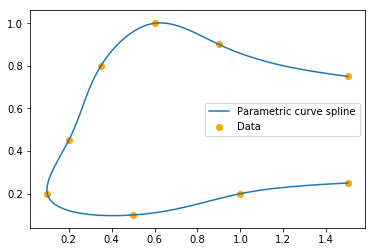

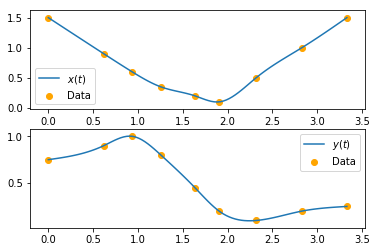

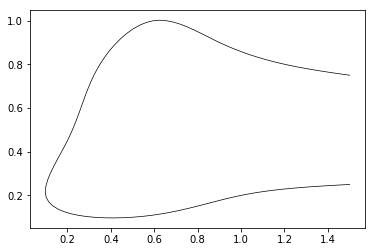

In [15]:
# Plotting parametric curves
# Carles Falcó i Gandia
# 16/11/18

tl = linspace(0,3.33,100)
xp = []
yp = []
for i in tl:
    xp.append(natural_spline(t_j,x_j,i))
    yp.append(natural_spline(t_j,y_j,i))
plt.scatter(x_j,y_j,label = 'Data',color='orange')
plt.plot(xp,yp,label='Parametric curve spline')
plt.legend()
plt.show()

# Visualazing the two splines x(t), y(t)
fig,ax = plt.subplots(2,1)
ax[0].plot(tl,xp,label = '$x(t)$')
ax[0].scatter(t_j,x_j,label='Data',color='orange')
ax[0].legend()

ax[1].plot(tl,yp,label = '$y(t)$')
ax[1].scatter(t_j,y_j,label='Data',color='orange')
ax[1].legend()

plt.show()

# Just parametric curve
plt.plot(xp,yp,color='black',linewidth = 0.7)
plt.show()